<img src="Survey Image.png" width="1000" height="1100">

# Stack Overflow Annual Developer Survey.



### The Tasks:

 - How many developers participated in this survey?
 - Find the top 10 countries participating devs are from.
 - How many are from Nigeria?
 - What's the average age the Nigerian dev wrote their first code?
 - What's the average age of the Nigerian dev?
 - What are the kinds of employment they are in?
 - What's the gender distribution?
 - What majors did they study in school?
 - What languages have they worked with?
 - What's the average number of languages they have worked with?
 - What's the average number of years of experience of the Nigerian developer?

### Kicker:

 - How many devs are women, age below 25 and earn a living from dev?
 - What are the 10 most popular languages among Naija devs?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# load data
Var_def = pd.read_csv("survey_results_schema.csv")
data = pd.read_csv("survey_results_public.csv")
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation) #to ignore unnecessary warnings I encountered

In [2]:
Var_def.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [3]:
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
data.shape

(64461, 61)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

## Data Preprocessing

### Convert Age1stCode, YearsCode and YearsCodePro to float

In [6]:
#replace the words to figures to be able to convert to float
data.replace({"Age1stCode": {'Younger than 5 years': '5', 'Older than 85': '85'}}, inplace = True)
data.replace({"YearsCode": {'Less than 1 year': '1', 'More than 50 years': '50'}}, inplace = True)
data.replace({"YearsCodePro": {'Less than 1 year': '1', 'More than 50 years':'50'}}, inplace = True)

In [7]:
#convert to float
cols = ['Age1stCode', 'YearsCode', 'YearsCodePro']
for col in cols:
    data[col] = pd.to_numeric(data[col])

### Treating missing values. Fill the float type with 0.0 and object type with "No Response"

In [8]:
float_values = {"Age": 0.0, "CompTotal": 0.0, "ConvertedComp": 0.0, "WorkWeekHrs": 0.0, "Age1stCode": 0.0, 
                "YearsCode": 0.0, "YearsCodePro": 0.0}
data.fillna(value = float_values, inplace = True)
data.fillna(value = "No Response", inplace = True)

In [9]:
data.isnull().sum()

Respondent            0
MainBranch            0
Hobbyist              0
Age                   0
Age1stCode            0
                     ..
WebframeWorkedWith    0
WelcomeChange         0
WorkWeekHrs           0
YearsCode             0
YearsCodePro          0
Length: 61, dtype: int64

### To clean up the data a bit, summarize some sentences

In [10]:
data.loc[data['MainBranch'].str.contains ('by profession'), ['MainBranch']] = 'Professsional'
data.loc[data['MainBranch'].str.contains ('student'), ['MainBranch']] = 'Student'
data.loc[data['MainBranch'].str.contains ('part of'), ['MainBranch']] = 'Part_time'
data.loc[data['MainBranch'].str.contains ('hobby'), ['MainBranch']] = 'Hobbyist'
data.loc[data['MainBranch'].str.contains ('no longer'), ['MainBranch']] = 'Former Professional'
data.loc[data['Employment'].str.contains ('self-employed'), ['Employment']] = 'Self-employed'
data.loc[data['Gender'].str.contains ('queer'), ['Gender']] = 'Genderqueer'
data.loc[data['Gender'].str.contains ('Woman;Man'), ['Gender']] = 'Transgender'
data.loc[data['EdLevel'].str.contains ('Bachelor’s'), ['EdLevel']] = 'Bachelors'
data.loc[data['EdLevel'].str.contains ('Master’s'), ['EdLevel']] = 'Masters'
data.loc[data['EdLevel'].str.contains ('study without'), ['EdLevel']] = 'College without degree'
data.loc[data['EdLevel'].str.contains ('Secondary'), ['EdLevel']] = 'Secondary school'
data.loc[data['EdLevel'].str.contains ('Associate'), ['EdLevel']] = 'Associate degree'
data.loc[data['EdLevel'].str.contains ('doctoral'), ['EdLevel']] = 'Doctorate'
data.loc[data['EdLevel'].str.contains ('elementary'), ['EdLevel']] = 'Elementary school'
data.loc[data['EdLevel'].str.contains ('Professional'), ['EdLevel']] = 'Professional degree'
data.loc[data['EdLevel'].str.contains ('never'), ['EdLevel']] = 'No formal education'
data.loc[data['UndergradMajor'].str.contains ('Computer'), ['UndergradMajor']] = 'Computer science'
data.loc[data['UndergradMajor'].str.contains ('engineering'), ['UndergradMajor']] = 'Engineering discipline'
data.loc[data['UndergradMajor'].str.contains ('Information'), ['UndergradMajor']] = 'Information systems'
data.loc[data['UndergradMajor'].str.contains ('natural'), ['UndergradMajor']] = 'Natural science'
data.loc[data['UndergradMajor'].str.contains ('Mathematics'), ['UndergradMajor']] = 'Math/Stat'
data.loc[data['UndergradMajor'].str.contains ('Web'), ['UndergradMajor']] = 'Web development'
data.loc[data['UndergradMajor'].str.contains ('humanities'), ['UndergradMajor']] = 'Humanities discipline'
data.loc[data['UndergradMajor'].str.contains ('social science'), ['UndergradMajor']] = 'Social science'
data.loc[data['UndergradMajor'].str.contains ('Fine arts'), ['UndergradMajor']] = 'Fine arts'
data.loc[data['UndergradMajor'].str.contains ('health science'), ['UndergradMajor']] = 'Health science'
data.loc[data['UndergradMajor'].str.contains ('business discipline'), ['UndergradMajor']] = 'Business discipline'

### Functions for visualization

In [11]:
#visualization function for bar chart for the columns with multiple selections
def bar_chart_multifeature(df, feature, position, label):
    var_split = df[feature].str.split(';')
    var_concat = np.concatenate(var_split.values)
    var_list = var_concat.tolist()
    count = Counter(var_list)
    df = pd.DataFrame.from_dict(count, orient='index').reset_index()
    df.columns=["Feature","Count"]
    df=df.sort_values("Count", ascending=False).reset_index()
    if position=='highest':
        df = df.head(10)
    elif position=='lowest':
        df = df.tail(10)
    elif position==None:
        df = df
    else:
        raise NameError('Please indicate \'highest\', \'lowest\' or None in the third positional argument')
    plt.figure(figsize=(13, 6))
    plt.title("A bar chart representing the " + label, fontsize=20)
    ax = sns.barplot(x="Count", y="Feature", data=df, color="b")
#visualization function for pie chart
def pie_chart(df, feature, position, label):
    plt.subplots(figsize=(14,8))
    df = pd.DataFrame(data[feature].value_counts())
    if position=='highest':
        df = df.head(10)
        plt.title("A pie representing the top 10 " + label, fontsize=20)
    elif position=='lowest':
        df = df.tail(10)
        plt.title("A pie representing the last 10 " + label, fontsize=20)
    elif position==None:
        df = df
        plt.title("A pie representing the " + label, fontsize=20)
    else:
        raise NameError('Please indicate \'highest\', \'lowest\' or None in the third position argument')
    labels = df.index
    df = df[::1]
    plt.pie(df, shadow=True, autopct='%1.1f%%', startangle=90)
    plt.legend(title=feature, labels=labels)
    plt.axis('equal') # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.show()
#visualization function for histogram
def hist(df, feature, label):
    plt.figure(figsize=(12,5))
    df=df[df[feature].values > 0].reset_index(drop=True)
    n,bins,patch = plt.hist(df[feature],bins=40, range=(5, 60), color='Purple')
    plt.title("A histogram showing the frequency distribution of the " + label
    + " with a mean of " +
    str(round(df[feature].mean(), 0)), fontsize=15)
    plt.xlabel(label, fontsize=15)

### How many developers participated in this survey

In [12]:
print("There are a total of " + str(len(data["Respondent"])) + " developers that participated in the survey")

There are a total of 64461 developers that participated in the survey


### Find the top 10 countries participating devs are from

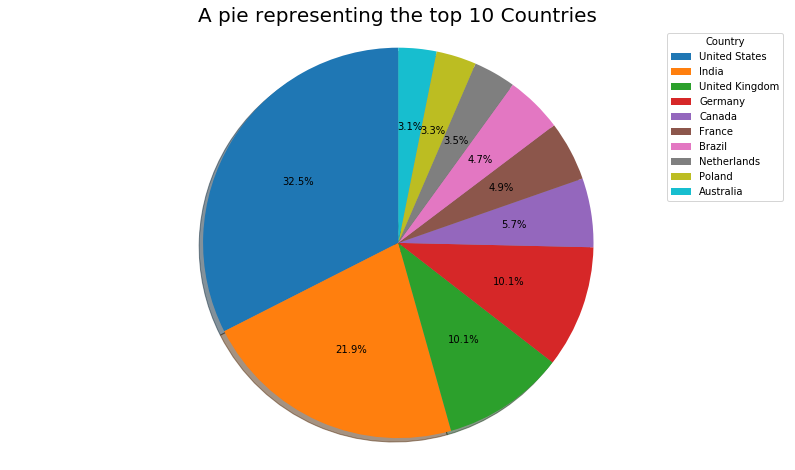

In [13]:
pie_chart(data, "Country", "highest", "Countries")

### How many are from Nigeria?

In [14]:
Nig_data=data[data.Country=="Nigeria"].reset_index(drop=True)
print("There are a total of " + str(len(Nig_data["Respondent"])) + " Nigerian developers that participated in the survey")

There are a total of 593 Nigerian developers that participated in the survey


### What's the average age the Nigerian dev wrote their first code?

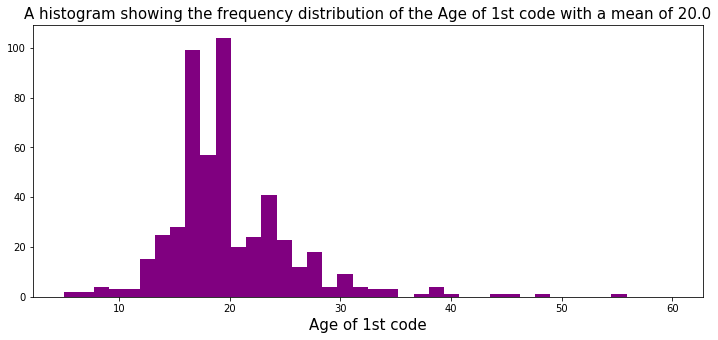

In [15]:
hist(Nig_data, "Age1stCode", "Age of 1st code")

### What's the average age of the Nigerian dev?

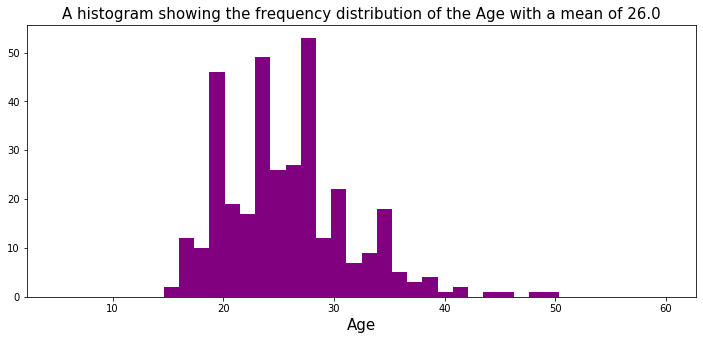

In [16]:
hist(Nig_data, "Age", "Age")

### What are the kinds of employment they are in?

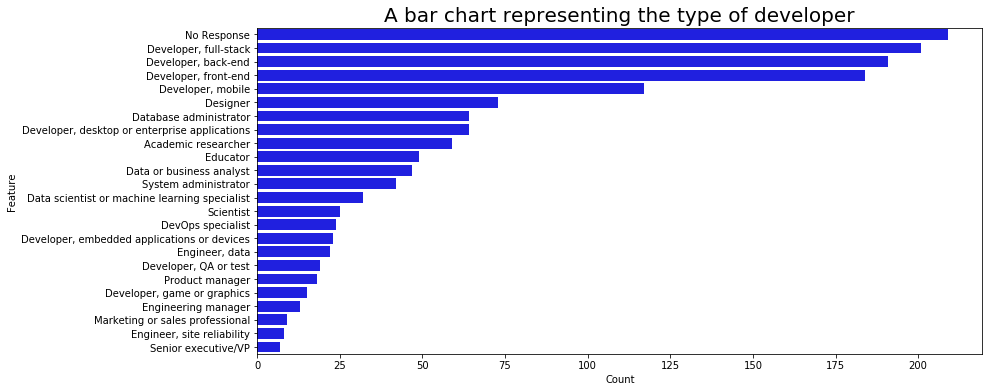

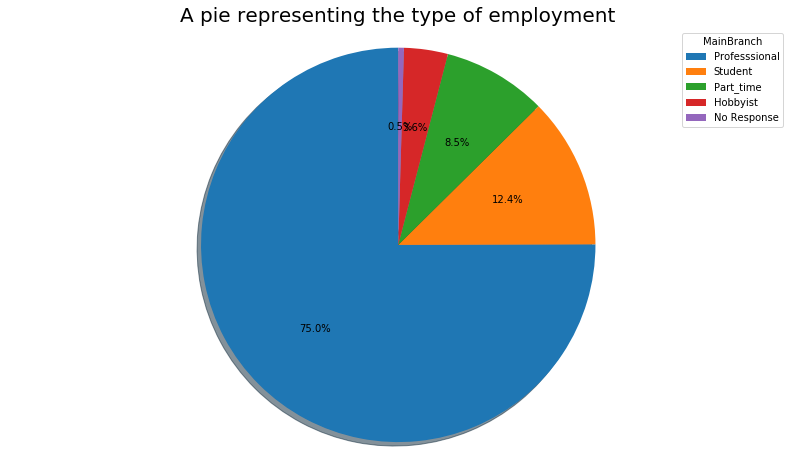

In [17]:
bar_chart_multifeature(Nig_data, "DevType", None, "type of developer")
pie_chart(Nig_data, "MainBranch", None, "type of employment")

### What's the gender distribution?

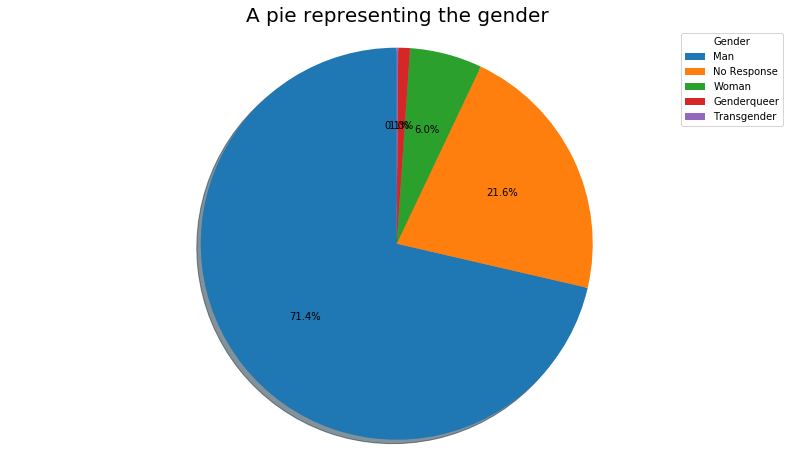

In [18]:
pie_chart(Nig_data, "Gender", None, "gender")

### What majors did they study in school?

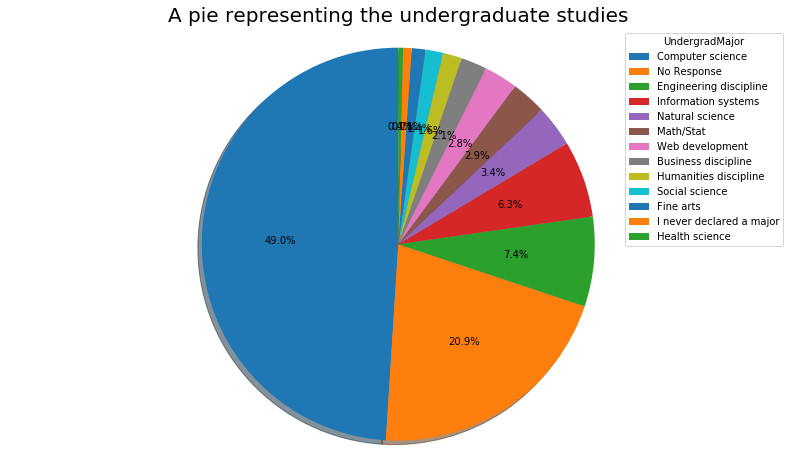

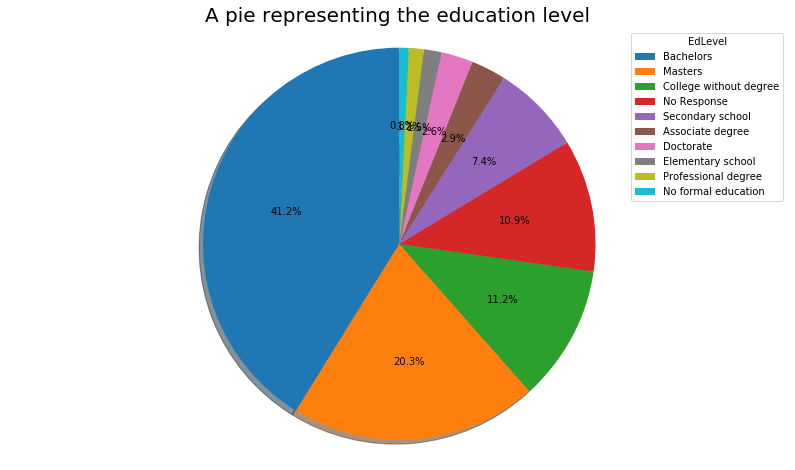

In [19]:
pie_chart(Nig_data, "UndergradMajor", None, "undergraduate studies")
pie_chart(Nig_data, "EdLevel", None, "education level")

### What languages have they worked with?

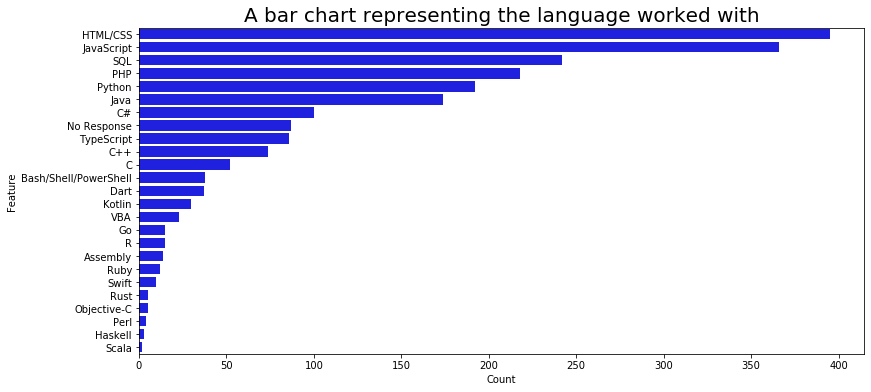

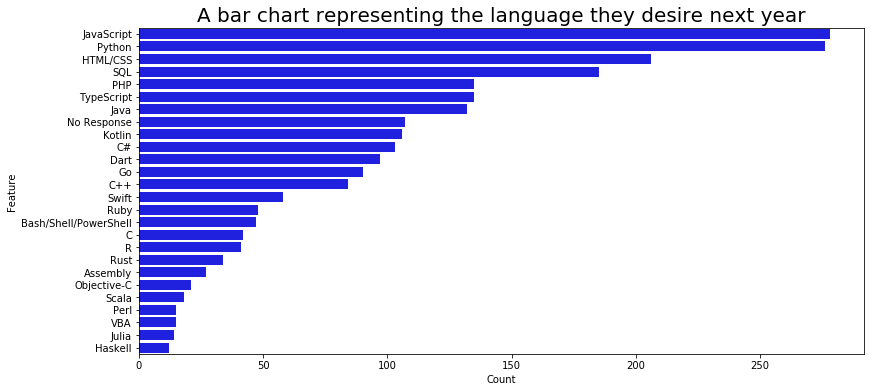

In [20]:
bar_chart_multifeature(Nig_data, "LanguageWorkedWith", None, "language worked with")
bar_chart_multifeature(Nig_data, "LanguageDesireNextYear", None, "language they desire next year")

### What's the average number of languages they have worked with?

In [21]:
var_split = Nig_data["LanguageWorkedWith"].str.split(';')
var_concat = np.concatenate(var_split.values)
var_list = var_concat.tolist()
count = Counter(var_list)
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df.columns=["Feature","Count"]
avg = (df["Count"]).sum()/len(Nig_data["Respondent"])
print("There are an average of " + str(round(avg, 0)) + " languages Nigerian developers have worked with")

There are an average of 4.0 languages Nigerian developers have worked with


### What's the average number of years of experience of the Nigerian developer?

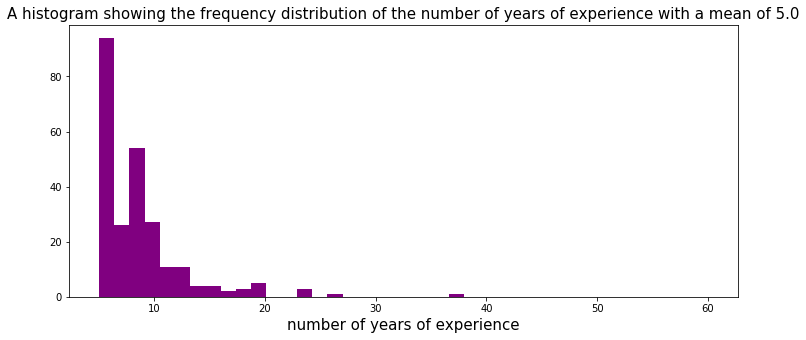

In [22]:
hist(Nig_data, "YearsCode", "number of years of experience")

# Kicker

### How many devs are women, age below 25 and earn a living from dev?

In [23]:
data_women=data[(data.Gender=="Woman") & (data.Age > 0.0) & (data.Age <= 25.0)
& (data.CompTotal > 0.0)]
print("There are a total of " + str(len(data_women["Respondent"])) + " women, age below 25 that are earning a living as developers")

There are a total of 496 women, age below 25 that are earning a living as developers


###  What are the 10 most popular languages among Naija devs?

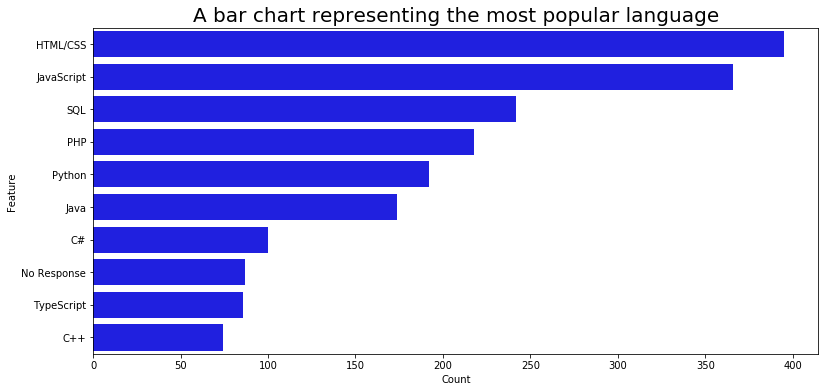

In [24]:
bar_chart_multifeature(Nig_data, "LanguageWorkedWith", "highest", "most popular language")